In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
df.head()

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576


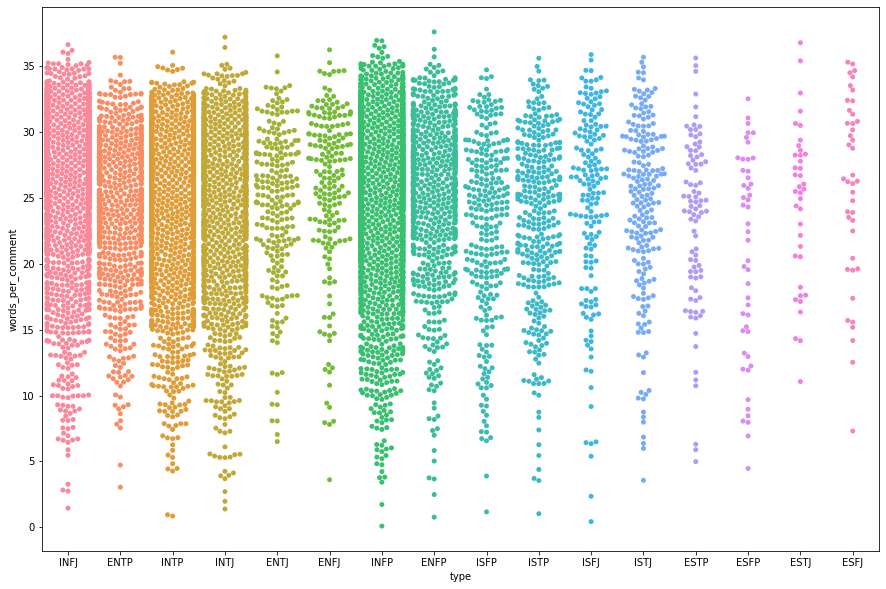

In [7]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=df)

In [8]:
df.groupby('type').agg({'type':'count'})


,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


In [9]:
df_2 = df[~df['type'].isin(['ESFJ','ESFP','ESTJ','ESTP'])]
df_2['http_per_comment'] = df_2['posts'].apply(lambda x: x.count('http')/50)
df_2['qm_per_comment'] = df_2['posts'].apply(lambda x: x.count('?')/50)
df_2.head()

C:\Users\C-Jayesh.P\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\C-Jayesh.P\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,type,posts,words_per_comment,variance_of_word_counts,http_per_comment,qm_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,0.48,0.36
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,0.20,0.10
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,0.10,0.24
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,0.04,0.22
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,0.12,0.20


In [10]:
print(df_2.groupby('type').agg({'http_per_comment': 'mean'}))
print(df_2.groupby('type').agg({'qm_per_comment': 'mean'}))

      http_per_comment
type                  
ENFJ          0.053263
ENFP          0.050459
ENTJ          0.053160
ENTP          0.048263
INFJ          0.065878
INFP          0.075426
INTJ          0.063593
INTP          0.070767
ISFJ          0.070602
ISFP          0.088339
ISTJ          0.061171
ISTP          0.081009
      qm_per_comment
type                
ENFJ        0.213053
ENFP        0.227259
ENTJ        0.240000
ENTP        0.220964
INFJ        0.208966
INFP        0.202533
INTJ        0.214849
INTP        0.221580
ISFJ        0.200964
ISFP        0.216384
ISTJ        0.214927
ISTP        0.221602


<Figure size 1080x720 with 0 Axes>

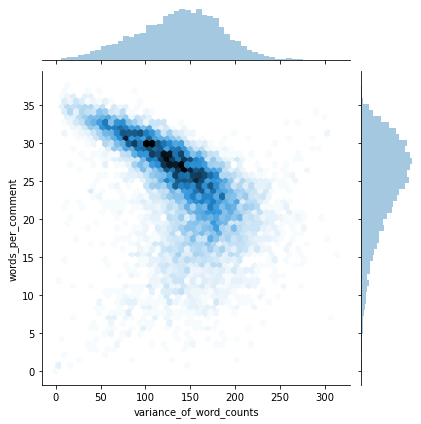

In [11]:
plt.figure(figsize=(15,10))
sns.jointplot("variance_of_word_counts", "words_per_comment", data=df_2, kind="hex")

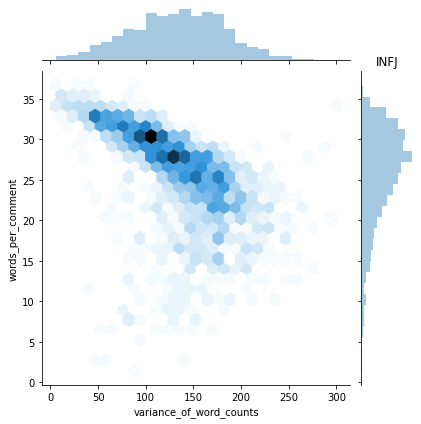

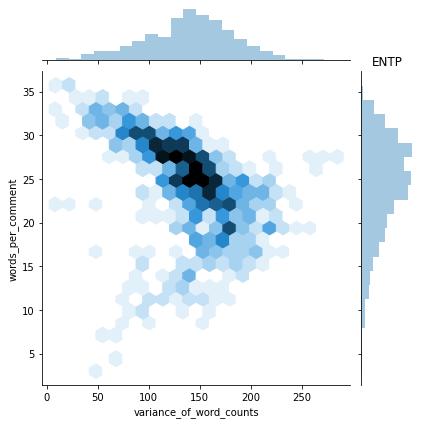

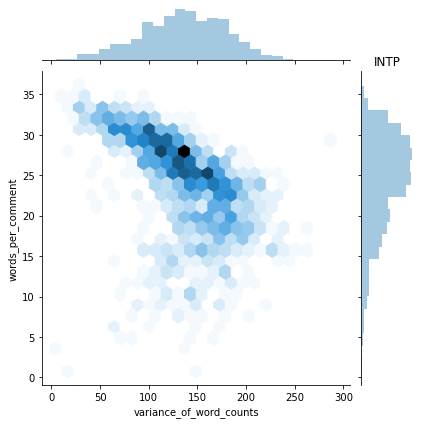

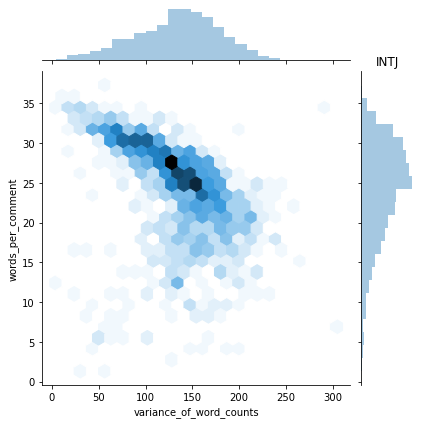

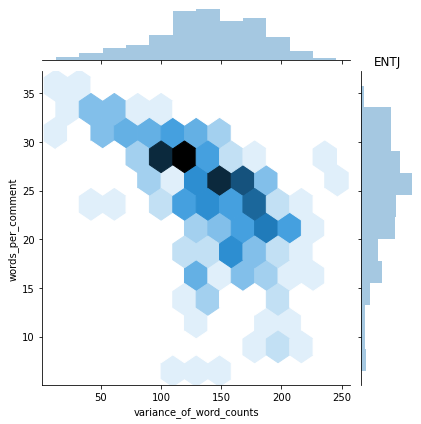

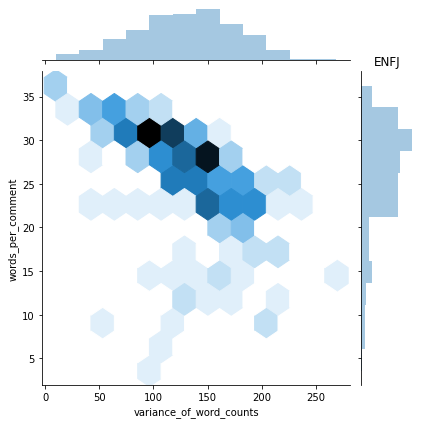

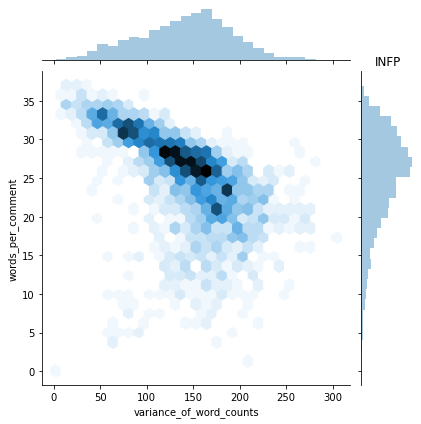

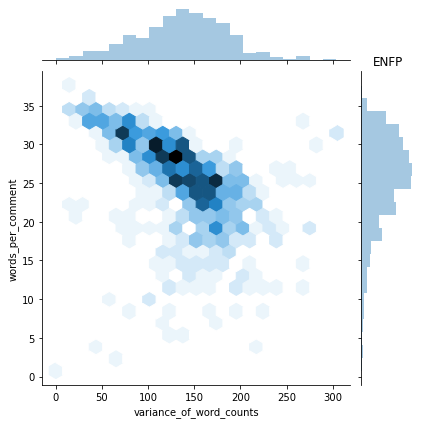

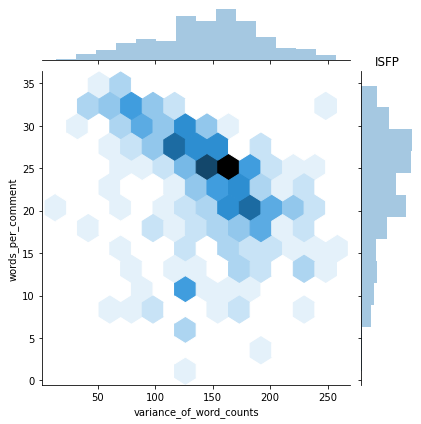

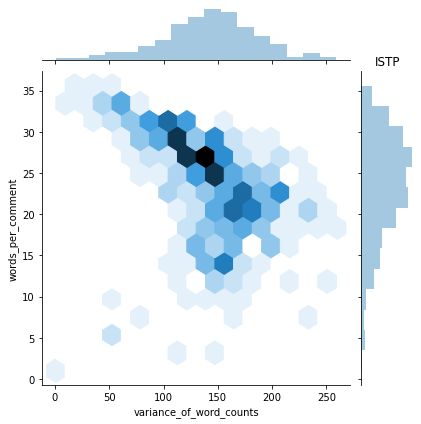

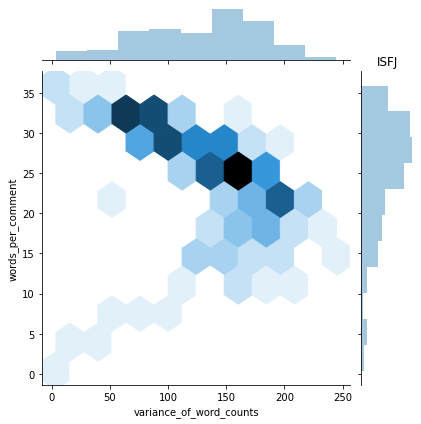

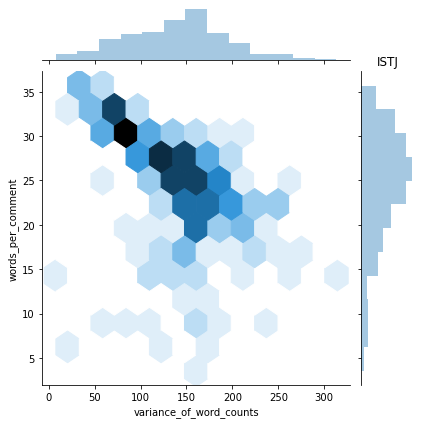

In [12]:
def plot_jointplot(mbti_type, axs, titles):
    df_3 = df_2[df_2['type'] == mbti_type]
    sns.jointplot("variance_of_word_counts", "words_per_comment", data=df_3, kind="hex", ax = axs, title = titles)
    
i = df_2['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_3 = df_2[df_2['type'] == i[k]]
        sns.jointplot("variance_of_word_counts", "words_per_comment", data=df_3, kind="hex")
        plt.title(i[k])
        k+=1

In [20]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,10*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

ImportError: cannot import name 'imread' from 'scipy.misc' (C:\Users\C-Jayesh.P\Anaconda3\lib\site-packages\scipy\misc\__init__.py)

In [17]:
pip install scipy==1.2


  Attempting uninstall: scipy
    Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0


ERROR: pandas-profiling 2.9.0 has requirement scipy>=1.4.1, but you'll have scipy 1.2.0 which is incompatible.
